In [1]:
# Import pandas, numpy, and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

sns.set_style("whitegrid")

Here, we're reading in the excel file containing the education gap data.

In [3]:
edgap = pd.read_excel(
    'https://raw.githubusercontent.com/brian-fischer/DATA-5100/main/EdGap_data.xlsx',
    dtype={'NCESSCH School ID': object}
)

/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


Here, we're downloading the school information dataset from dropbox, and then reading it in as a csv.

In [67]:
!wget -O ccd_sch_029_1617_w_1a_11212017.csv https://www.dropbox.com/s/lkl5nvcdmwyoban/ccd_sch_029_1617_w_1a_11212017.csv?dl=0

--2025-10-09 22:14:41--  https://www.dropbox.com/s/lkl5nvcdmwyoban/ccd_sch_029_1617_w_1a_11212017.csv?dl=0
Resolving proxy.server (proxy.server)... 10.0.0.66
Connecting to proxy.server (proxy.server)|10.0.0.66|:3128... connected.
Proxy request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/o8wf1f534pb4u7uavgjxm/ccd_sch_029_1617_w_1a_11212017.csv?rlkey=k2aey38xie2vz9ge4a0v3rrib&dl=0 [following]
--2025-10-09 22:14:41--  https://www.dropbox.com/scl/fi/o8wf1f534pb4u7uavgjxm/ccd_sch_029_1617_w_1a_11212017.csv?rlkey=k2aey38xie2vz9ge4a0v3rrib&dl=0
Reusing existing connection to www.dropbox.com:443.
Proxy request sent, awaiting response... 302 Found
Location: https://uca9ec6539d09d8339cdc2ee5224.dl.dropboxusercontent.com/cd/0/inline/Cy4BOOtgxxJB79THRPshm8Wpfk9PECMPHEvVnKsXoMpT68607g7wS1iad11Sku6EzKT9TEVXpcxdf4kSiwJZdBNzFAoYlDGC26gj6LT7OPTZMHpVDOEDAU0DgfZPt8JK5Is/file# [following]
--2025-10-09 22:14:41--  https://uca9ec6539d09d8339cdc2ee5224.dl.dropboxusercontent.

In [68]:
school_information = pd.read_csv(
    "ccd_sch_029_1617_w_1a_11212017.csv", encoding="unicode_escape"
)

/tmp/ipykernel_172/2591098979.py:1: DtypeWarning: Columns (6,9,14,15,18,19,21,22,25,26,29,31,35,39,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  school_information = pd.read_csv(


This code gives us some quick information about the layout of the two datasets.

In [7]:
edgap.head()

NCESSCH School ID  CT Unemployment Rate  CT Pct Adults with College Degree  \
0      100001600143              0.117962                           0.445283   
1      100008000024              0.063984                           0.662765   
2      100008000225              0.056460                           0.701864   
3      100017000029              0.044739                           0.692062   
4      100018000040              0.077014                           0.640060   

   CT Pct Childre In Married Couple Family  CT Median Household Income  \
0                                 0.346495                     42820.0   
1                                 0.767619                     89320.0   
2                                 0.713090                     84140.0   
3                                 0.641283                     56500.0   
4                                 0.834402                     54015.0   

   School ACT average (or equivalent if SAT score)  \
0                                        20.433455   
1                                        19.498168   
2                                        19.554335   
3                                        17.737485   
4                                        18.245421   

   School Pct Free and Reduced Lunch  
0                           0.066901  
1                           0.112412  
2                           0.096816  
3                           0.296960  
4                           0.262641

In [52]:
school_information.head()

SCHOOL_YEAR STATENAME  ST                          SCH_NAME  \
0   2016-2017   ALABAMA  AL  Sequoyah Sch - Chalkville Campus   
1   2016-2017   ALABAMA  AL                             Camps   
2   2016-2017   ALABAMA  AL                           Det Ctr   
3   2016-2017   ALABAMA  AL     Wallace Sch - Mt Meigs Campus   
4   2016-2017   ALABAMA  AL         McNeel Sch - Vacca Campus   

                 LEA_NAME ST_LEAID   LEAID     ST_SCHID       NCESSCH   SCHID  \
0  Alabama Youth Services   AL-210  100002  AL-210-0020  1.000020e+10  100277   
1  Alabama Youth Services   AL-210  100002  AL-210-0050  1.000020e+10  101667   
2  Alabama Youth Services   AL-210  100002  AL-210-0060  1.000020e+10  101670   
3  Alabama Youth Services   AL-210  100002  AL-210-0030  1.000020e+10  101705   
4  Alabama Youth Services   AL-210  100002  AL-210-0040  1.000020e+10  101706   

   ...   MZIP                     LSTREET1        LCITY  LSTATE   LZIP  \
0  ...  35220  1000 Industrial School Road   Birmingham      AL  35220   
1  ...  36057           1601 County Rd. 57   Prattville      AL  36067   
2  ...  36057       2109 Bashi Rd Bldg 509  Thomasville      AL  36784   
3  ...  36057  1000 Industrial School Road  Mount Meigs      AL  36057   
4  ...  35206            8950 Roebuck Blvd   Birmingham      AL  35206   

  UPDATED_STATUS_TEXT EFFECTIVE_DATE       SCH_TYPE_TEXT SCH_TYPE LEVEL  
0                Open         3/3/10  Alternative School        4  High  
1                Open         3/3/10  Alternative School        4  High  
2                Open         3/3/10  Alternative School        4  High  
3                Open         3/3/10  Alternative School        4  High  
4                Open         3/3/10  Alternative School        4  High  

[5 rows x 23 columns]

In [9]:
edgap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7986 entries, 0 to 7985
Data columns (total 7 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   NCESSCH School ID                                7986 non-null   object 
 1   CT Unemployment Rate                             7972 non-null   float64
 2   CT Pct Adults with College Degree                7973 non-null   float64
 3   CT Pct Childre In Married Couple Family          7961 non-null   float64
 4   CT Median Household Income                       7966 non-null   float64
 5   School ACT average (or equivalent if SAT score)  7986 non-null   float64
 6   School Pct Free and Reduced Lunch                7986 non-null   float64
dtypes: float64(6), object(1)
memory usage: 436.9+ KB


In [69]:
school_information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102183 entries, 0 to 102182
Data columns (total 65 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SCHOOL_YEAR          102183 non-null  object 
 1   FIPST                102183 non-null  int64  
 2   STATENAME            102183 non-null  object 
 3   ST                   102183 non-null  object 
 4   SCH_NAME             102183 non-null  object 
 5   LEA_NAME             102183 non-null  object 
 6   STATE_AGENCY_NO      102183 non-null  object 
 7   UNION                2533 non-null    float64
 8   ST_LEAID             102183 non-null  object 
 9   LEAID                102183 non-null  object 
 10  ST_SCHID             102183 non-null  object 
 11  NCESSCH              102181 non-null  float64
 12  SCHID                102181 non-null  float64
 13  MSTREET1             102181 non-null  object 
 14  MSTREET2             1825 non-null    object 
 15  MSTREET3         

This is a quick plot to check if there is a relationship between ACT scores and the socioeconomic variables we're looking at in this analysis.

/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_in

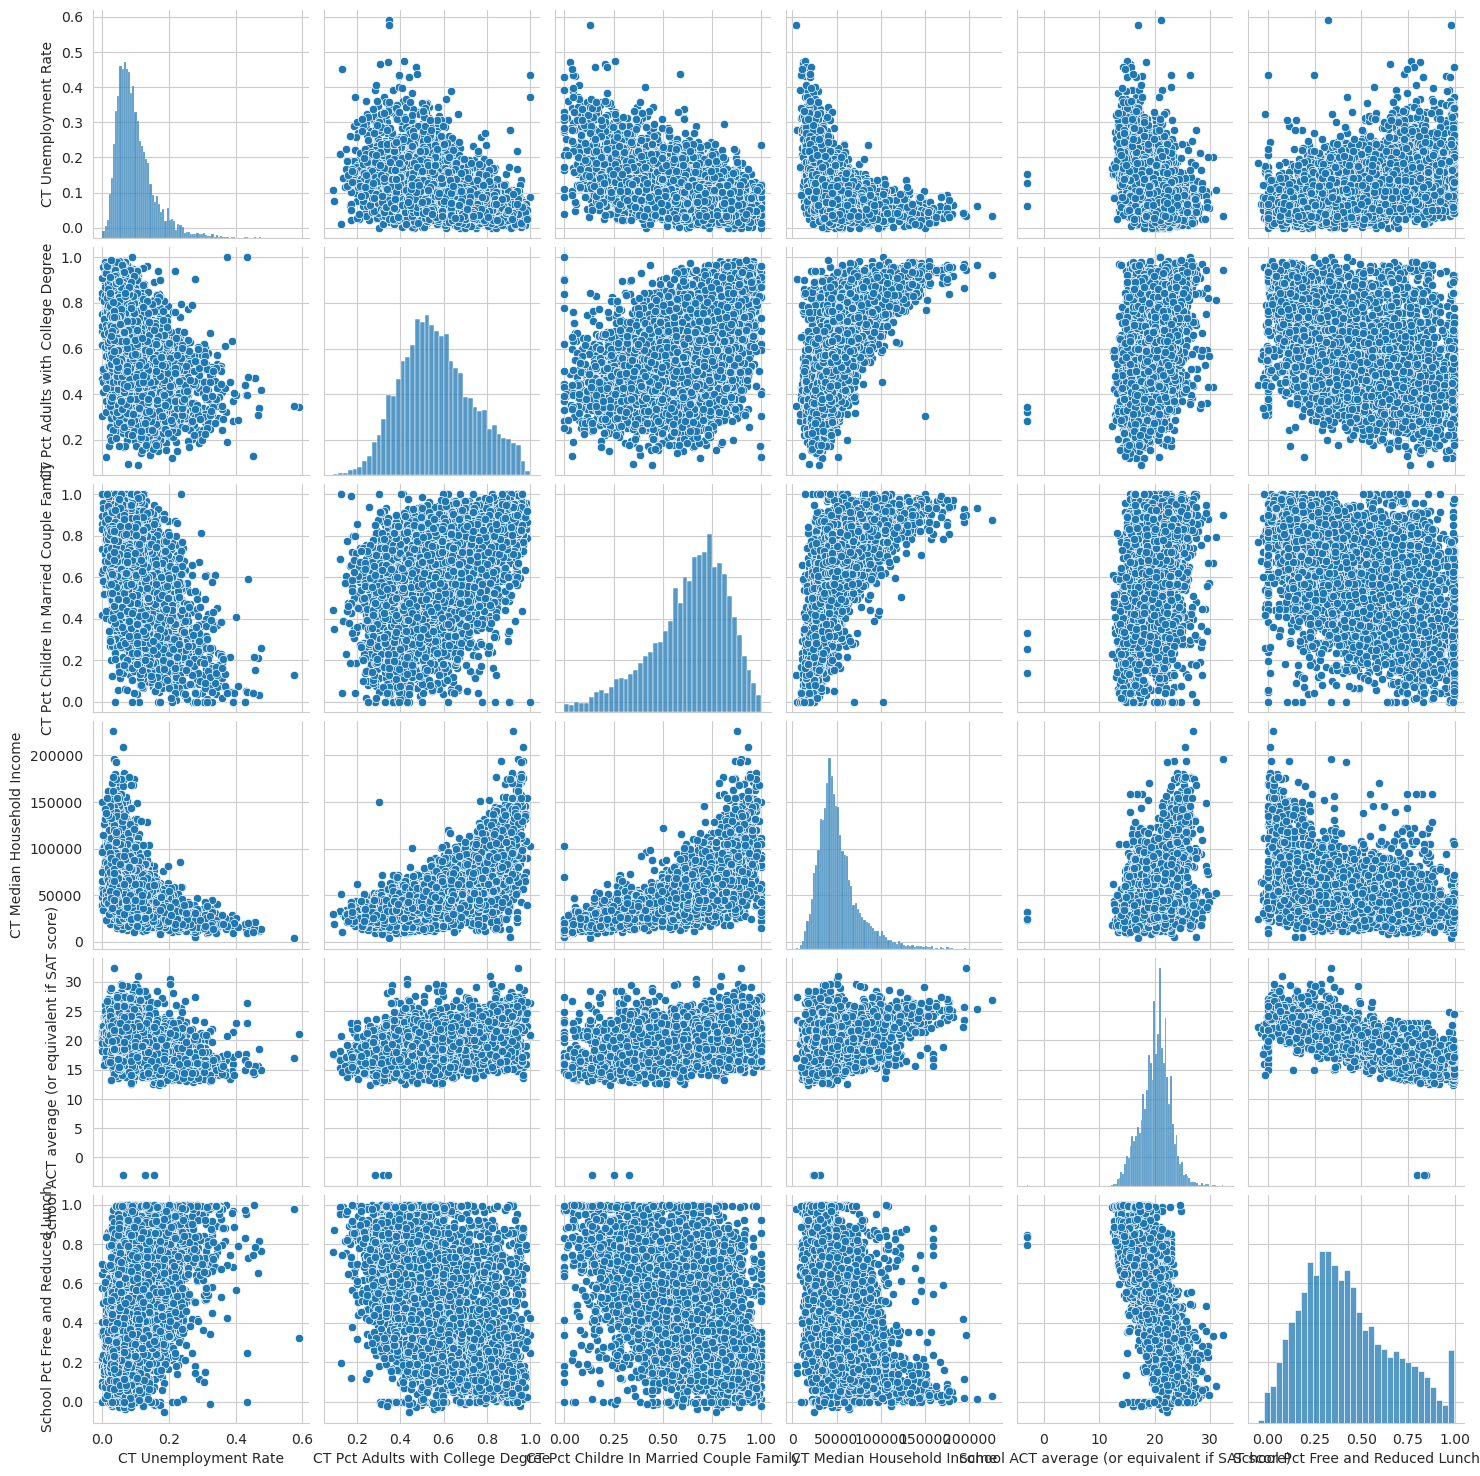

In [11]:
sns.pairplot(
    edgap.drop(columns="NCESSCH School ID")
);
plt.show()

This allows us to further focus in on the relationships between school ACT averages and the socioeconomic factors affecting the schools.

/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


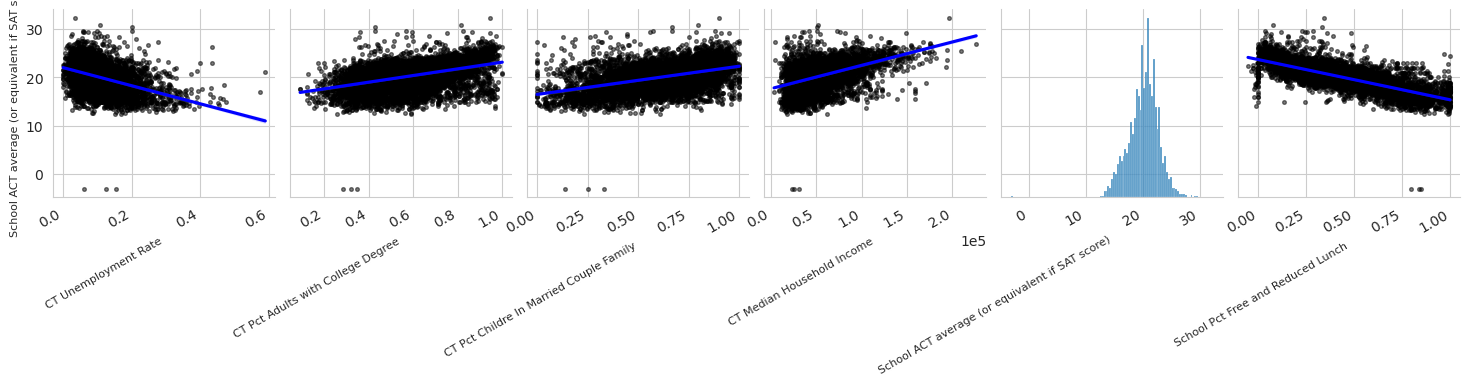

In [17]:
fig = sns.pairplot(
    edgap.drop(columns="NCESSCH School ID"),
    y_vars=['School ACT average (or equivalent if SAT score)'],
    kind="reg",
    plot_kws={
        "line_kws": {"color": "blue"},
        "scatter_kws": {"alpha": 0.5, "color": "k", "s": 7},
    },
)

for ax in fig.axes.flat:
    if ax.get_xlabel() == 'CT Median Household Income':
        ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))  # Apply scientific notation
    ax.set_xlabel(ax.get_xlabel(), fontsize=8, rotation=30, ha='right') # X-axis label size and rotation
    ax.set_ylabel(ax.get_ylabel(), fontsize=8) # Y-axis label size

    #Rotate x-axis tick labels
    plt.setp(ax.get_xticklabels(), rotation=30, ha='right')

plt.show()

We only care about a certain selection of data, and so we filter out all the excess.

In [71]:
school_information = school_information[
    ['SCHOOL_YEAR', 'NCESSCH', 'LSTATE', 'LZIP', 'SCH_TYPE_TEXT', 'LEVEL', 'CHARTER_TEXT']
]

In [72]:
school_information.head()

SCHOOL_YEAR       NCESSCH LSTATE   LZIP       SCH_TYPE_TEXT LEVEL  \
0   2016-2017  1.000020e+10     AL  35220  Alternative School  High   
1   2016-2017  1.000020e+10     AL  36067  Alternative School  High   
2   2016-2017  1.000020e+10     AL  36784  Alternative School  High   
3   2016-2017  1.000020e+10     AL  36057  Alternative School  High   
4   2016-2017  1.000020e+10     AL  35206  Alternative School  High   

  CHARTER_TEXT  
0           No  
1           No  
2           No  
3           No  
4           No

Here, we rename these variables for ease of use later, and to allow us to combine them on the "id" column.

In [30]:
edgap = edgap.rename(
    columns={
        "NCESSCH School ID": "id",
        "CT Pct Adults with College Degree": "percent_college",
        "CT Unemployment Rate": "rate_unemployment",
        "CT Pct Childre In Married Couple Family": "percent_married",
        "CT Median Household Income": "median_income",
        "School ACT average (or equivalent if SAT score)": "average_act",
        "School Pct Free and Reduced Lunch": "percent_lunch",
    }
)

In [73]:
school_information = school_information.rename(
    columns={
        "SCHOOL_YEAR": "year",
        "NCESSCH": "id",
        "LSTATE": "state",
        "LZIP": "zip_code",
        "SCH_TYPE_TEXT": "school_type",
        "LEVEL": "school_level",
        "CHARTER_TEXT": "charter"
    }
)

In [74]:
edgap.head()

id  rate_unemployment  percent_college  percent_married  \
0  100001600143           0.117962         0.445283         0.346495   
1  100008000024           0.063984         0.662765         0.767619   
2  100008000225           0.056460         0.701864         0.713090   
3  100017000029           0.044739         0.692062         0.641283   
4  100018000040           0.077014         0.640060         0.834402   

   median_income  average_act  percent_lunch  
0        42820.0    20.433455       0.066901  
1        89320.0    19.498168       0.112412  
2        84140.0    19.554335       0.096816  
3        56500.0    17.737485       0.296960  
4        54015.0    18.245421       0.262641

In [75]:
edgap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7986 entries, 0 to 7985
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 7986 non-null   object 
 1   rate_unemployment  7972 non-null   float64
 2   percent_college    7973 non-null   float64
 3   percent_married    7961 non-null   float64
 4   median_income      7966 non-null   float64
 5   average_act        7986 non-null   float64
 6   percent_lunch      7986 non-null   float64
dtypes: float64(6), object(1)
memory usage: 436.9+ KB


In [76]:
school_information.head()

year            id state zip_code         school_type school_level  \
0  2016-2017  1.000020e+10    AL    35220  Alternative School         High   
1  2016-2017  1.000020e+10    AL    36067  Alternative School         High   
2  2016-2017  1.000020e+10    AL    36784  Alternative School         High   
3  2016-2017  1.000020e+10    AL    36057  Alternative School         High   
4  2016-2017  1.000020e+10    AL    35206  Alternative School         High   

  charter  
0      No  
1      No  
2      No  
3      No  
4      No

Here, we convert the "id" column in school_information to an object type, so it matches that of edgap, and allows us to merge them successfully.

In [77]:
school_information['id'] = school_information['id'].astype('object')

In [80]:
school_information.head()

year             id state zip_code         school_type school_level  \
0  2016-2017  10000200277.0    AL    35220  Alternative School         High   
1  2016-2017  10000201667.0    AL    36067  Alternative School         High   
2  2016-2017  10000201670.0    AL    36784  Alternative School         High   
3  2016-2017  10000201705.0    AL    36057  Alternative School         High   
4  2016-2017  10000201706.0    AL    35206  Alternative School         High   

  charter  
0      No  
1      No  
2      No  
3      No  
4      No

Here, we're merging the two datasets together.

In [81]:
df = edgap.merge(
    school_information,
    how='left',
    on='id'
)

After merging, we look at the characteristics of our new dataset.

In [82]:
df.head()

id  rate_unemployment  percent_college  percent_married  \
0  100001600143           0.117962         0.445283         0.346495   
1  100008000024           0.063984         0.662765         0.767619   
2  100008000225           0.056460         0.701864         0.713090   
3  100017000029           0.044739         0.692062         0.641283   
4  100018000040           0.077014         0.640060         0.834402   

   median_income  average_act  percent_lunch       year state zip_code  \
0        42820.0    20.433455       0.066901  2016-2017    DE    19804   
1        89320.0    19.498168       0.112412  2016-2017    DE    19709   
2        84140.0    19.554335       0.096816  2016-2017    DE    19709   
3        56500.0    17.737485       0.296960  2016-2017    DE    19958   
4        54015.0    18.245421       0.262641  2016-2017    DE    19934   

      school_type school_level charter  
0  Regular School         High     Yes  
1  Regular School         High      No  
2  Regular School         High      No  
3  Regular School         High      No  
4  Regular School         High      No

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7986 entries, 0 to 7985
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 7986 non-null   object 
 1   rate_unemployment  7972 non-null   float64
 2   percent_college    7973 non-null   float64
 3   percent_married    7961 non-null   float64
 4   median_income      7966 non-null   float64
 5   average_act        7986 non-null   float64
 6   percent_lunch      7986 non-null   float64
 7   year               7898 non-null   object 
 8   state              7898 non-null   object 
 9   zip_code           7898 non-null   object 
 10  school_type        7898 non-null   object 
 11  school_level       7898 non-null   object 
 12  charter            7898 non-null   object 
dtypes: float64(6), object(7)
memory usage: 811.2+ KB


In [84]:
df.describe()

rate_unemployment  percent_college  percent_married  median_income  \
count        7972.000000      7973.000000      7961.000000    7966.000000   
mean            0.098730         0.568930         0.633440   52026.905222   
std             0.058959         0.165704         0.196764   24228.057079   
min             0.000000         0.091493         0.000000    3589.000000   
25%             0.058655         0.450828         0.523810   36597.250000   
50%             0.085649         0.554979         0.667594   46833.500000   
75%             0.123376         0.676571         0.777135   61369.250000   
max             0.590278         1.000000         1.000000  226181.000000   

       average_act  percent_lunch  
count  7986.000000    7986.000000  
mean     20.181532       0.420651  
std       2.595201       0.239754  
min      -3.070818      -0.054545  
25%      18.600000       0.238501  
50%      20.400000       0.381570  
75%      21.910867       0.575447  
max      32.362637       0.998729

Here, we're looking for any potential outliers in the dataset, specifically data that we know is impossible.

In [85]:
df.select_dtypes(include=['number']).agg(['min', 'max']).round(2)

rate_unemployment  percent_college  percent_married  median_income  \
min               0.00             0.09              0.0         3589.0   
max               0.59             1.00              1.0       226181.0   

     average_act  percent_lunch  
min        -3.07          -0.05  
max        32.36           1.00

In the table above, we can see that there is a negative ACT score, which should be impossible, as it goes from 1 to 36. And we can also see that there is a negative percent lunch, which is also impossible, as it should only go from 0% to 100%. Because of this, we are replacing any values that are outside the realm of possible entries with nan values.

In [86]:
df.loc[df['percent_lunch'] <0, 'percent_lunch'] = np.nan

In [87]:
df.loc[df['average_act'] <1, 'average_act'] = np.nan

Here, we're looking at the categorical data to see if there's anything that doesn't make sense to include when looking at ACT scores.

In [88]:
df['school_type'].value_counts()

school_type
Regular School                 7885
Alternative School               10
Special Education School          2
Career and Technical School       1
Name: count, dtype: int64

In [89]:
df['school_level'].value_counts()

school_level
High            7230
Other            631
Not reported      35
Elementary         2
Name: count, dtype: int64

In [90]:
df['charter'].value_counts()

charter
No                7329
Yes                352
Not applicable     217
Name: count, dtype: int64

It doesn't make sense to include school levels other than High School, because the ACT is taken in high school, so we're filtering the dataset to only include high schools.

In [91]:
df = df.loc[df['school_level'] == 'High']

Here, we're just checking to make sure there's no duplicated values, and then looking at the number of missing values we have left to deal with.

In [92]:
df.duplicated().sum()

0

In [93]:
df.isna().sum().to_frame(name='Number of Missing Values')

Number of Missing Values
id                                        0
rate_unemployment                        12
percent_college                          11
percent_married                          20
median_income                            16
average_act                               3
percent_lunch                            20
year                                      0
state                                     0
zip_code                                  0
school_type                               0
school_level                              0
charter                                   0

In [95]:
percent_missing = df.isna().mean().round(4) * 100

percent_missing.to_frame(name='Percent Missing Values')

Percent Missing Values
id                                   0.00
rate_unemployment                    0.17
percent_college                      0.15
percent_married                      0.28
median_income                        0.22
average_act                          0.04
percent_lunch                        0.28
year                                 0.00
state                                0.00
zip_code                             0.00
school_type                          0.00
school_level                         0.00
charter                              0.00

Here, we're looking at what states we have data for.

In [96]:
df['state'].value_counts()

state
TX    913
OH    654
IL    564
PA    543
MI    498
NC    407
FL    404
GA    367
WI    351
NJ    341
MO    337
IN    321
NY    295
TN    265
WA    263
MA    253
KY    198
LA    194
WY     38
DE     24
Name: count, dtype: int64

In [97]:
df['state'].nunique()

20

Its important to note we only have data for 20 states.

To show what states we have data for, we can make a quick choropleth chart to illustrate this point and highlight the data we do and don't have.

In [98]:
import plotly.offline as po
import plotly.graph_objs as pg

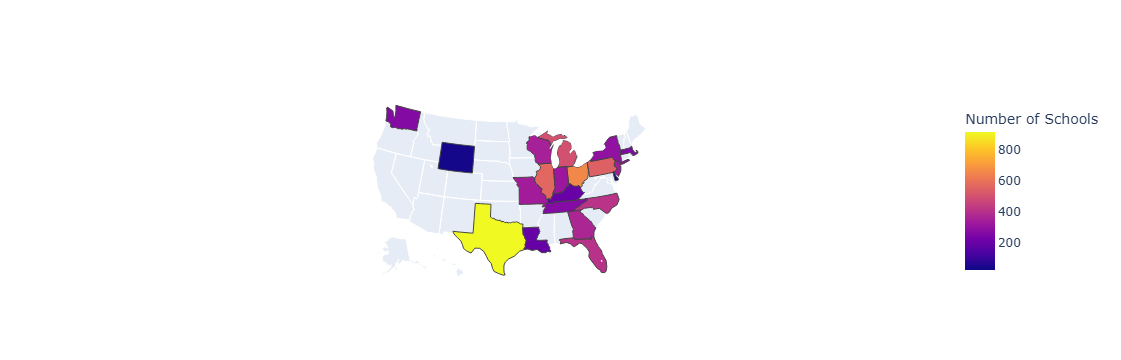

In [100]:
layout = dict(
    geo={"scope": "usa"}, coloraxis_colorbar=dict(title="Number of Schools")
)

data = dict(
    type="choropleth",
    locations=df["state"].value_counts().index,
    locationmode="USA-states",
    z=df["state"].value_counts().values,
    coloraxis="coloraxis",
)

x = pg.Figure(data=[data], layout=layout)

po.iplot(x)

Here, we're removing any data where the ACT score is NA, because without an ACT score, we're unable to do the rest of our analysis, so entries without ACT scores are not useful in this dataset.

In [101]:
df = df.dropna(subset = ['average_act'])

In [102]:
df.isna().sum().to_frame(name='Number of Missing Values')

Number of Missing Values
id                                        0
rate_unemployment                        12
percent_college                          11
percent_married                          20
median_income                            16
average_act                               0
percent_lunch                            20
year                                      0
state                                     0
zip_code                                  0
school_type                               0
school_level                              0
charter                                   0

To deal with the remaining NA values, we're going to impute the values that are missing. To start, we define the predictor variables to be used for data imputation.

In [103]:
predictor_variables = [
    'rate_unemployment',
    'percent_college',
    'percent_married',
    'median_income',
    'percent_lunch',
    'state',
    'charter'
]

We're going to use an iterative imputer to impute the missing values. To start, we import necesary packages from sklearn, and set the imputer to the imported imputer.

In [104]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [105]:
imputer = IterativeImputer() # Creates imputer object

Here, we're going to fit the imputer using the numerical predictor values that we have. We define the set of predictors that are numerical values, and we will use them in the imputation process.

In [107]:
numerical_predictors = df[predictor_variables].select_dtypes(include='number').columns.to_list()

print(numerical_predictors)

['rate_unemployment', 'percent_college', 'percent_married', 'median_income', 'percent_lunch']


Here, we're going to fit the imputer with the data from those columns.

In [108]:
imputer.fit(df.loc[:, numerical_predictors]) # Fit the imputer

IterativeImputer()

Finally, we apply the transform method to apply those imputed values to the dataset.

In [109]:
df.loc[:, numerical_predictors] = imputer.transform(df.loc[:, numerical_predictors])

In [110]:
df.isna().sum().to_frame(name='Number of Missing Values')

Number of Missing Values
id                                        0
rate_unemployment                         0
percent_college                           0
percent_married                           0
median_income                             0
average_act                               0
percent_lunch                             0
year                                      0
state                                     0
zip_code                                  0
school_type                               0
school_level                              0
charter                                   0

Here, we export the cleaned csv for use later.

In [111]:
df.to_csv(
    'education_clean.csv',
    encoding='utf-8-sig',
    index=False
)

Here, we're importing some additional libraries for Exploratory Data Analysis

In [ ]:
from sklearn.preprocessing import StandardScaler

import statsmodels.formula.api as smf
import statsmodels.api as sm

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.stats.anova import anova_lm

Here, we're creating a matrix of the correlation coefficients between the numerical predictor variables and mapping these to a plot.

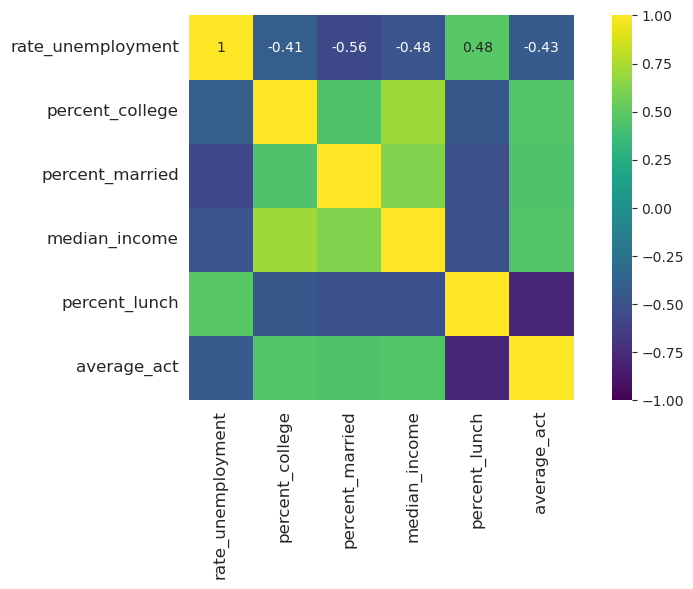

In [121]:
corr_matrix = df[numerical_predictors + ["average_act"]].corr()

plt.figure(figsize=(10, 5))

sns.heatmap(
    corr_matrix, vmax=1, vmin=-1, square=True, annot=True, cmap="viridis"
)

plt.tick_params(labelsize=12)

plt.show()

We can see that all numerical variables have some correlation coefficient value with ACT scores, with percent lunch having a significant higher coefficient than the others. In addition to looking at the correlation between ACT scores and the numerical predictors, its also important to note the correlation coefficients between the numerical predictors, to see whether there is enough overlap between two of them to the point we might only need to include one or the other in our analysis.

Here, we're using the charter variable as a categorical predictor on the analysis.

/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/envs/anaconda-ai-2024

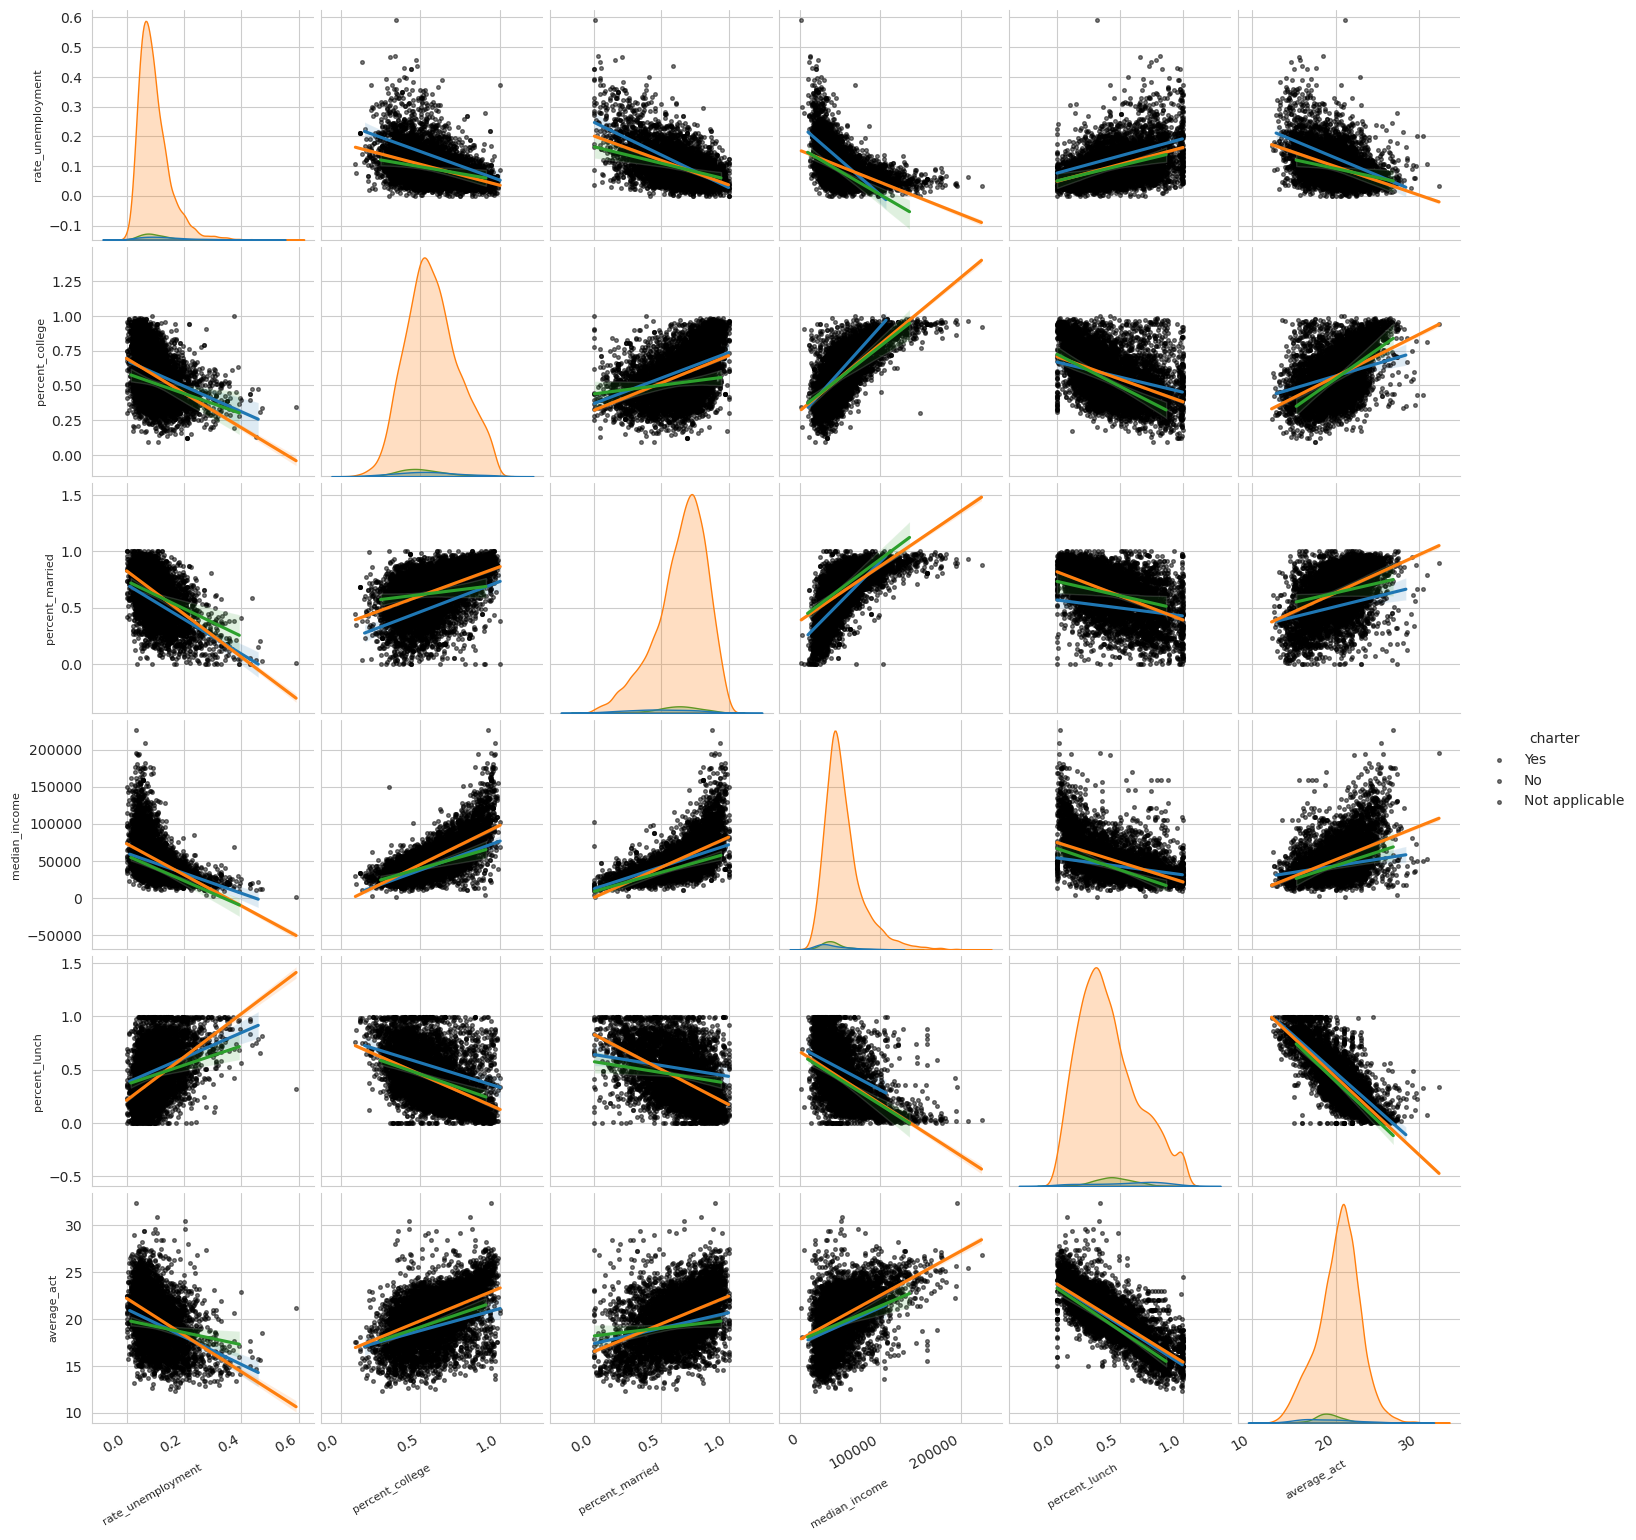

In [116]:
fig = sns.pairplot(
    data=df,
    vars=numerical_predictors + ['average_act'],
    hue='charter',
    kind='reg',
    plot_kws={'scatter_kws': {'alpha':0.5, "color": "k", "s":7},
    },
)

for ax in fig.axes.flat:
    if ax.get_xlabel() == 'CT Median Household Income':
        ax.ticklabel_format(style="sci", axis='x', scilimits=(0,0)) # Apply scientific notation
    ax.set_xlabel(ax.get_xlabel(), fontsize=8, rotation=30, ha='right') # X-axis label size and rotation
    ax.set_ylabel(ax.get_ylabel(), fontsize=8) # Y-axis label size

    plt.setp(ax.get_xticklabels(), rotation=30, ha='right')

plt.show()

As we can see, there are relationships between the socioeconomic variables and the ACT scores, and also can see the relationships between whether a school is a charter or not, and its impacts on socioeconomic factors and ACT scores.

Here, we're creating boxplots to identify outliers for the numerical predictors. The first set of box plots will be for the numerical values between 0 and 1, and the second will be for median income which will be on a much larger scale.

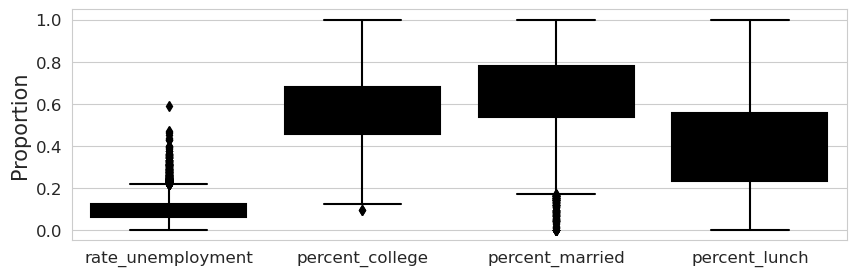

In [118]:
plt.figure(figsize=(10,3))

fractions = list(numerical_predictors)
fractions.remove('median_income')

sns.boxplot(data=df[fractions], color='k')

plt.ylabel('Proportion', fontsize=15)

plt.tick_params(labelsize=12)

plt.show()

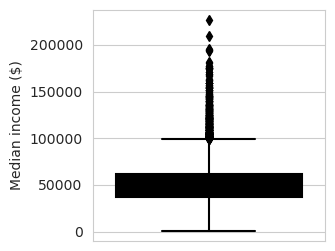

In [119]:
plt.figure(figsize=(3,3))

sns.boxplot(data=df, y='median_income', color='k')

plt.ylabel('Median income ($)')

plt.show()

In both cases, while we can see outliers, it doesn't seem as if the outliers are that out of place, and should still be fine when being used for this analysis.